In [1]:
from __future__ import division
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy import stats
import seaborn as sns
import xgboost as xgb
import scipy as scipy
from scipy.sparse import csr_matrix
from sklearn.grid_search import GridSearchCV

In [2]:
!pwd

/Users/Annmarie/ga-data-science


In [3]:
## import all the files we will need
## import all the files we will need
test = pd.read_csv('./orange_small_test/orange_small_test.data',header=0,delimiter='\t')
train = pd.read_csv("cleanData",sep = ",", dtype = 'float32')
labels= pd.read_csv('./orange_small_train_appetency.labels.txt',dtype = 'float32', header=-1 ,delimiter='\t')

In [4]:
test["label"] = labels

In [5]:
columnNames = test.columns

goodColumns1 = columnNames[:188].tolist()
goodColumns1.append( columnNames[230] )

dftNew = test[goodColumns1]

In [6]:
test.count()

Var1        688
Var2       1284
Var3       1282
Var4       1638
Var5       1506
Var6      44391
Var7      44377
Var8          0
Var9        688
Var10      1506
Var11      1282
Var12       565
Var13     44377
Var14      1282
Var15         0
Var16      1506
Var17      1638
Var18      1638
Var19      1638
Var20         0
Var21     44391
Var22     44884
Var23      1506
Var24     42761
Var25     44884
Var26      1506
Var27      1506
Var28     44881
Var29       688
Var30       688
          ...  
Var202    50000
Var203    49855
Var204    50000
Var205    48057
Var206    44391
Var207    50000
Var208    49855
Var209        0
Var210    50000
Var211    50000
Var212    50000
Var213     1142
Var214    24712
Var215      682
Var216    50000
Var217    49343
Var218    49343
Var219    44737
Var220    50000
Var221    50000
Var222    50000
Var223    44737
Var224      855
Var225    23981
Var226    50000
Var227    50000
Var228    50000
Var229    21568
Var230        0
label     50000
dtype: int64

In [7]:
## Fill NaN values with the mean value of the column in order to prep the data for modeling 
for columnName in dftNew.columns:
    mean = dftNew[columnName].mean()
    dftNew[columnName].fillna(mean,inplace=True)

/Users/Annmarie/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [8]:
dftNew.count()

Var1      50000
Var2      50000
Var3      50000
Var4      50000
Var5      50000
Var6      50000
Var7      50000
Var8          0
Var9      50000
Var10     50000
Var11     50000
Var12     50000
Var13     50000
Var14     50000
Var15         0
Var16     50000
Var17     50000
Var18     50000
Var19     50000
Var20         0
Var21     50000
Var22     50000
Var23     50000
Var24     50000
Var25     50000
Var26     50000
Var27     50000
Var28     50000
Var29     50000
Var30     50000
          ...  
Var160    50000
Var161    50000
Var162    50000
Var163    50000
Var164    50000
Var165    50000
Var166    50000
Var167        0
Var168    50000
Var169        0
Var170    50000
Var171    50000
Var172    50000
Var173    50000
Var174    50000
Var175        0
Var176    50000
Var177    50000
Var178    50000
Var179    50000
Var180    50000
Var181    50000
Var182    50000
Var183    50000
Var184    50000
Var185        0
Var186    50000
Var187    50000
Var188    50000
label     50000
dtype: int64

In [9]:
dftNew.dropna(inplace = True, axis = 1)

/Users/Annmarie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [10]:
dftNew.to_csv("cleanTestData",index = False)

In [11]:
##change datatype

finaltDf = pd.read_csv("cleanTestData",sep = ",", dtype = 'float32')

In [12]:
finaltDf.head()

,Var1,Var2,Var3,Var4,Var5,Var6,Var7,Var9,Var10,Var11,...,Var179,Var180,Var181,Var182,Var183,Var184,Var186,Var187,Var188,label
0,11.767442,0.015576,404.131836,0.126374,224088.65625,1225.0,7.0,43.80814,360282.6875,8.586583,...,2.19475,3695632.5,0.0,1476623.625,73787.609375,10.221184,2.860465,13.110465,165.1586,-1.0
1,11.767442,0.015576,404.131836,0.126374,224088.65625,259.0,0.0,43.80814,360282.6875,8.586583,...,2.19475,3695632.5,0.0,1476623.625,73787.609375,10.221184,2.860465,13.110465,165.1586,-1.0
2,11.767442,0.015576,404.131836,0.126374,224088.65625,861.0,14.0,43.80814,360282.6875,8.586583,...,2.19475,3695632.5,0.0,1476623.625,73787.609375,10.221184,2.860465,13.110465,165.1586,-1.0
3,11.767442,0.015576,404.131836,0.126374,224088.65625,1568.0,7.0,43.80814,360282.6875,8.586583,...,2.19475,3695632.5,0.0,1476623.625,73787.609375,10.221184,2.860465,13.110465,165.1586,-1.0
4,11.767442,0.015576,404.131836,0.126374,224088.65625,1197.0,7.0,43.80814,360282.6875,8.586583,...,2.19475,3695632.5,0.0,1476623.625,73787.609375,10.221184,2.860465,13.110465,165.1586,-1.0


In [13]:
finaltDf.dtypes

Var1      float32
Var2      float32
Var3      float32
Var4      float32
Var5      float32
Var6      float32
Var7      float32
Var9      float32
Var10     float32
Var11     float32
Var12     float32
Var13     float32
Var14     float32
Var16     float32
Var17     float32
Var18     float32
Var19     float32
Var21     float32
Var22     float32
Var23     float32
Var24     float32
Var25     float32
Var26     float32
Var27     float32
Var28     float32
Var29     float32
Var30     float32
Var33     float32
Var34     float32
Var35     float32
           ...   
Var156    float32
Var157    float32
Var158    float32
Var159    float32
Var160    float32
Var161    float32
Var162    float32
Var163    float32
Var164    float32
Var165    float32
Var166    float32
Var168    float32
Var170    float32
Var171    float32
Var172    float32
Var173    float32
Var174    float32
Var176    float32
Var177    float32
Var178    float32
Var179    float32
Var180    float32
Var181    float32
Var182    float32
Var183    

**_Analysis_**

At this point all of the data has been preprocessed and is clean. Both finalDf and finaltDf have been cleaned and prepared for analysis. In the following portion of the notebook I will do my analysis using both the sklearn random forest model and the xgboosted random forest model. To create an unbias analysis of the models I will be using the AUC or area under the curve to measure the strength of each model in comparison to the other. For simplicity I will be reimporting the clean csvs and libraries below. While redundant this should make the code cleaner and easier to read than the above preprocessing and checking. To view the preprocessing of finalDf please access FinalProjectPart3 which is saved to this repository. 

In [14]:
#import libraries
from __future__ import division
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
import pylab as pl
import numpy as np
import sklearn as sklearn
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy import stats
import seaborn as sns
import xgboost as xgb
import scipy as scipy
from scipy.sparse import csr_matrix
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
from sklearn.datasets import make_multilabel_classification
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn import metrics
import graphviz as graphviz

In [15]:
#import data
test = pd.read_csv("cleanTestData",sep = ",", dtype = 'float32')
train = pd.read_csv("cleanData",sep = ",", dtype = 'float32')

colsRes = ['label']
X = train.drop('label', axis=1)
X_test = test.drop('label', axis=1)
y = labels

In [16]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(X, y)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model,out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree.dot -o tree.png")
    
build_tree_image(model)
%matplotlib inline

In [17]:
features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

/Users/Annmarie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
101,Var113,0.082640
46,Var57,0.065776
140,Var153,0.049435
82,Var94,0.041974
24,Var28,0.041789


In [18]:
y_test = model.predict(X_test)

In [19]:
y_test

array([-1., -1., -1., ..., -1., -1., -1.], dtype=float32)

In [20]:
print(type(y[0]))
print(type(y_test[0]))
fpr, tpr, thresholds = metrics.roc_curve(y, y_test,pos_label=1)
metrics.auc(fpr,tpr)

<class 'pandas.core.series.Series'>
<type 'numpy.float32'>


0.49739051750370067

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, y_test)

array([[48026,  1084],
       [  875,    15]])

**_Checkpoint_**

After completing the decision tree classifier we can see that feature Var 113 is the feature with the highest importance score. Lets move forward and change some parameters and see what happens!

In [23]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
                max_depth = 5,
                min_samples_leaf = 12)

model.fit(X, y)

build_tree_image(model)

from sklearn.tree import export_graphviz
from os import system 
def build_tree_image(model):
    dotfile = open("tree2.dot", 'w')
    export_graphviz(model,out_file = dotfile, feature_names = X.columns)
    dotfile.close()
    system("dot -Tpng tree2.dot -o tree2.png")
    
build_tree_image(model)

features = X.columns
feature_importances = model.feature_importances_

features_df = pd.DataFrame({'Features': features, 'Importance Score': feature_importances})
features_df.sort('Importance Score', inplace=True, ascending=False)

features_df.head()

/Users/Annmarie/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Features,Importance Score
114,Var126,0.546272
69,Var81,0.092490
46,Var57,0.037175
100,Var112,0.036647
121,Var133,0.033808


In [24]:
y_test = model.predict(X_test)

In [25]:
print(type(y[0]))
print(type(y_test[0]))
fpr, tpr, thresholds = metrics.roc_curve(y, y_test,pos_label=1)
metrics.auc(fpr,tpr)

<class 'pandas.core.series.Series'>
<type 'numpy.float32'>


0.5

In [26]:
from sklearn.metrics import confusion_matrix

In [27]:
confusion_matrix(y, y_test)

array([[49110,     0],
       [  890,     0]])

**_Checkpoint_**

Above I tuned the model to limit the depth of the tree. After doing this we can see that our feature importance scores changed drastically but we also have much more significant importance values. 

In [28]:
###lets attempt a gradient boosted tree
from scipy.sparse import csc_matrix

y_train = labels 
features = list(train.columns[2:])


In [29]:
y_train

,0
0,-1.0
1,-1.0
2,-1.0
3,-1.0
4,-1.0
5,-1.0
6,-1.0
7,-1.0
8,-1.0
9,-1.0


In [30]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
import xgboost as xgb
import operator
from matplotlib import pylab as p

In [31]:
import pandas as pd
import xgboost as xgb
import operator
from matplotlib import pylab as plt

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

def get_data():

    features = list(train.columns[2:])

   
    for feat in train.select_dtypes(include=['object']).columns:
        m = train.groupby([feat])['label'].mean()
        train[feat].replace(m,inplace=True)

    x_train = train[features]

    return features, x_train, y_train


features, x_train, y_train = get_data()
ceate_feature_map(features)


In [61]:
xgb_params ={'objective': 'reg:linear',
            'eta': 0.005,
            'subsample': 0.7,
            'max_depth': 12,
            'min_child_weight': 6,
            'colsample_bytree': 0.7,
            'silent': 1
              }
num_rounds = 500

In [62]:
dtrain = xgb.DMatrix(x_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

,feature,fscore
0,Var47,0.000020
1,Var62,0.000020
2,Var29,0.000039
3,Var148,0.000039
4,Var97,0.000039
5,Var93,0.000039
6,Var142,0.000059
7,Var156,0.000059
8,Var158,0.000059
9,Var131,0.000099


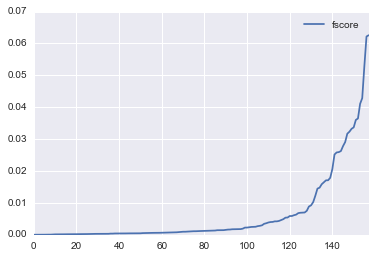

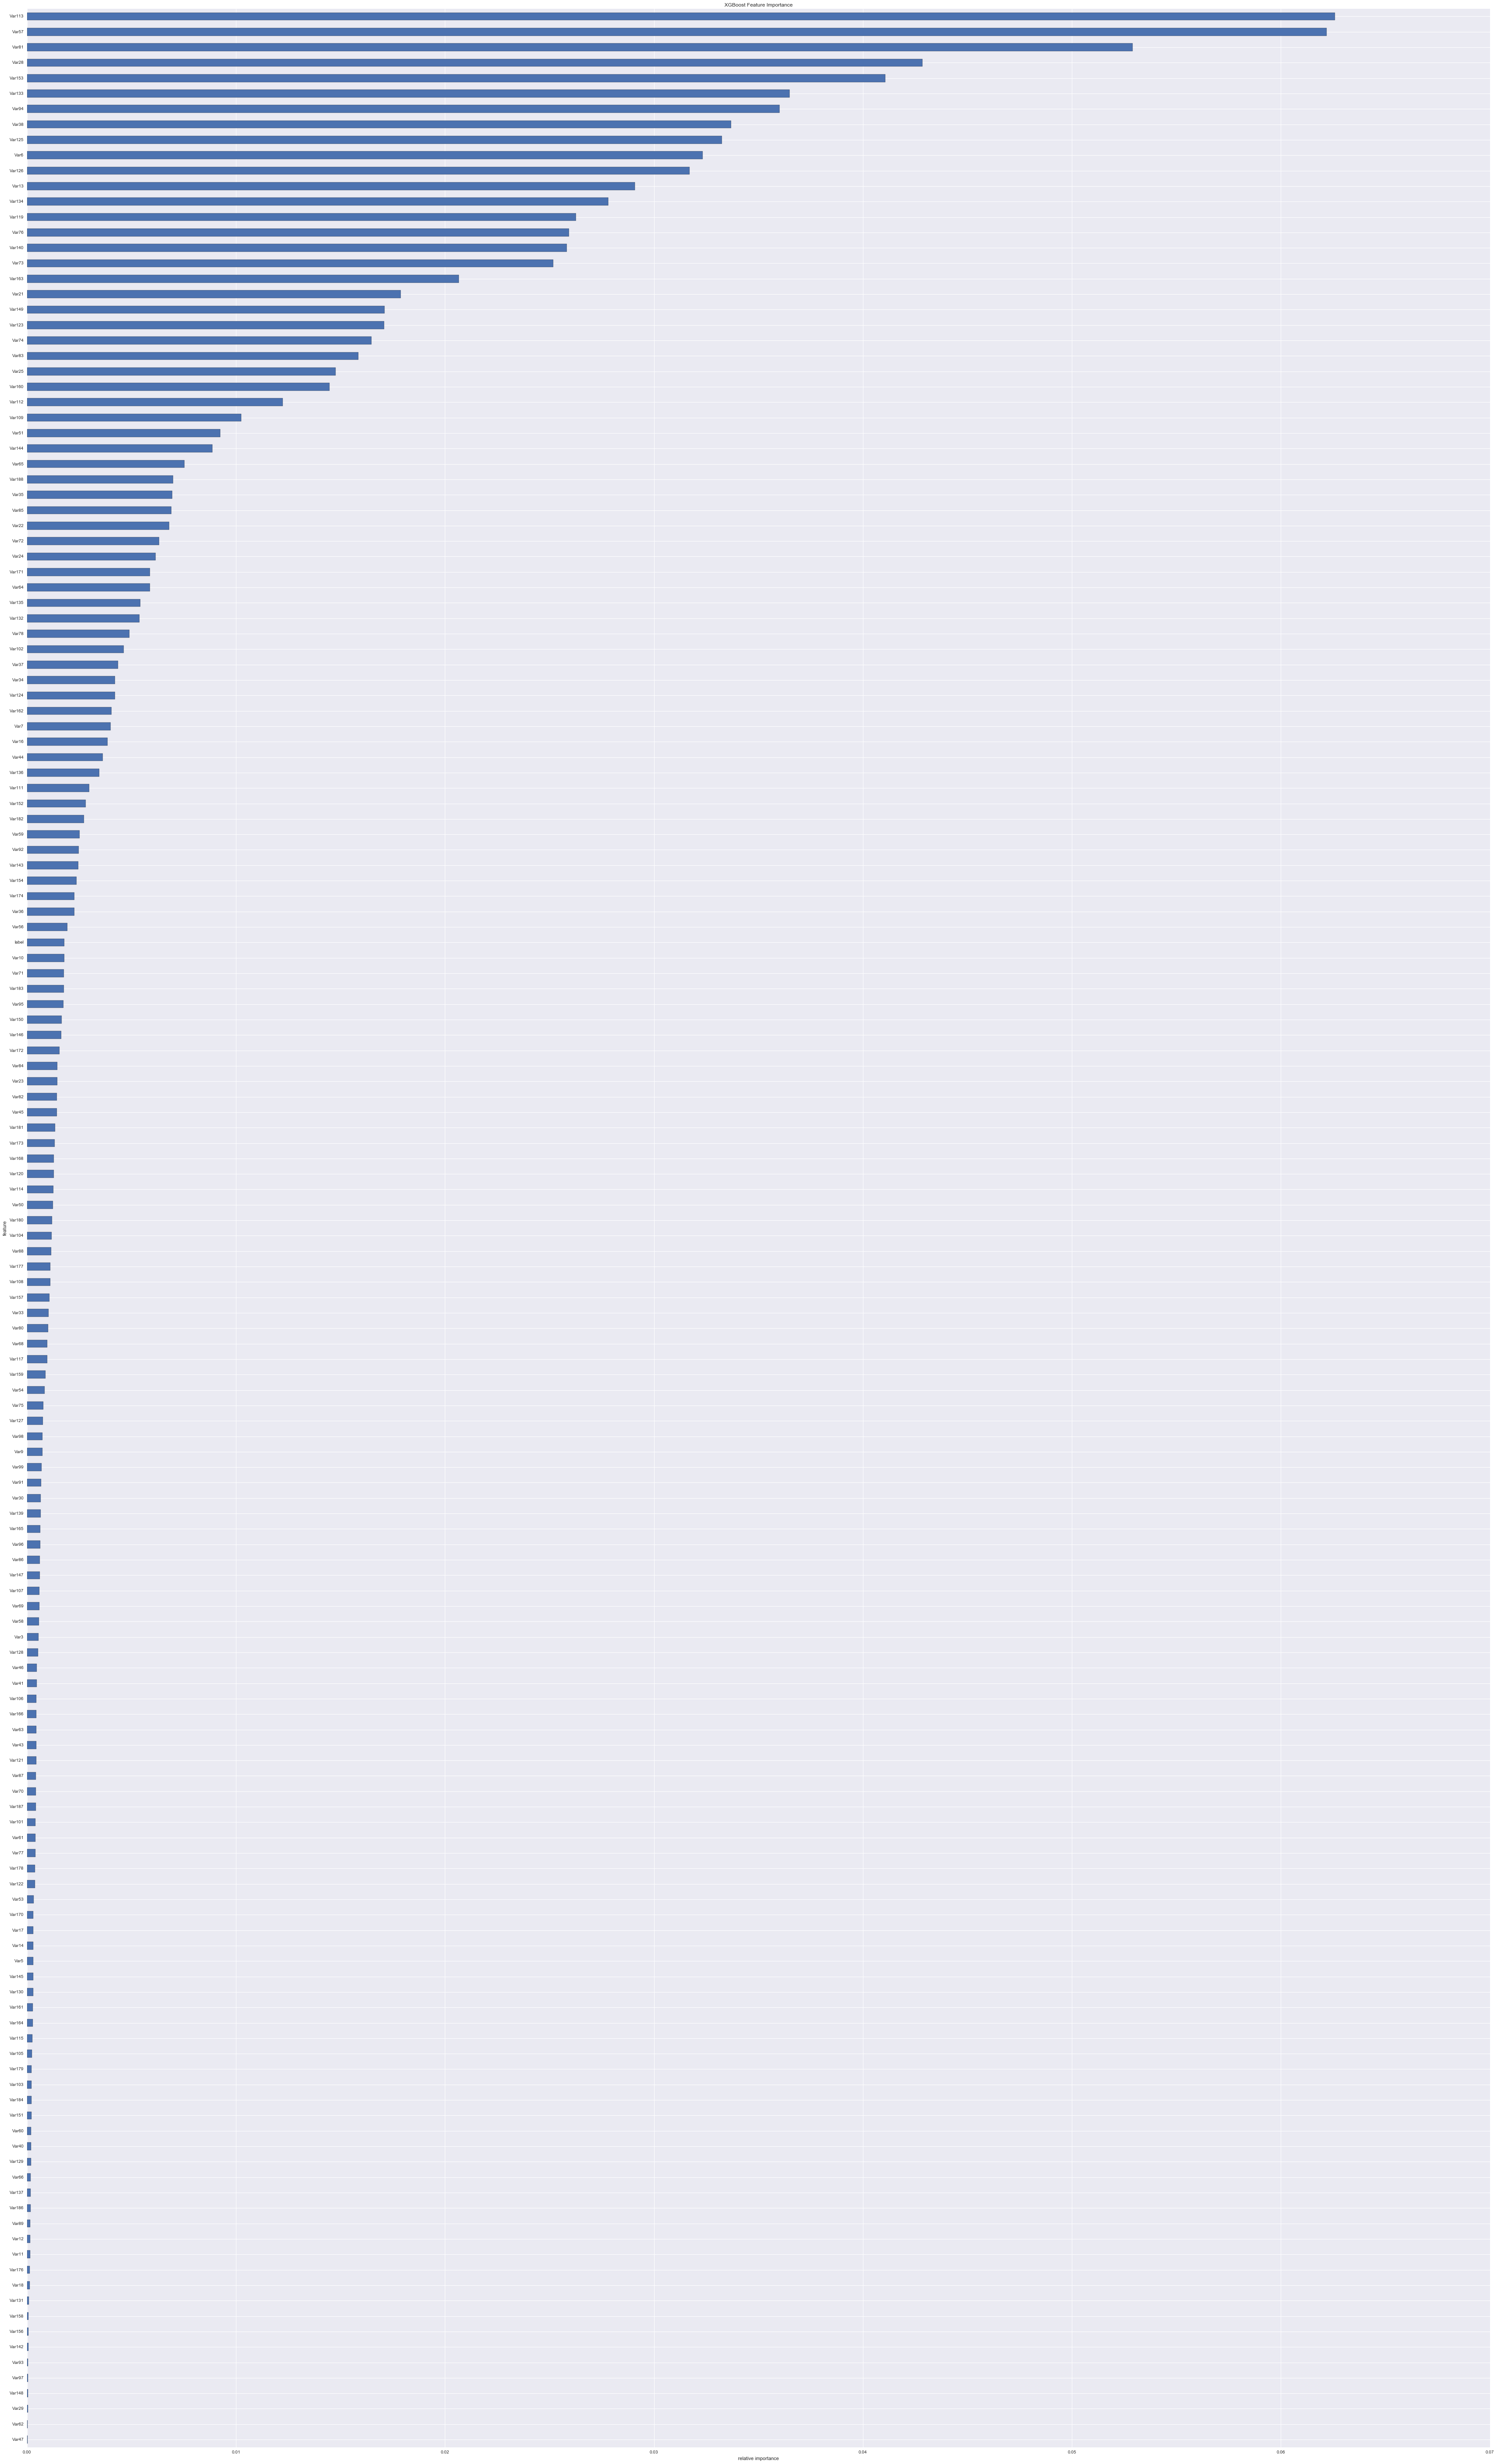

In [63]:
importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(60, 100))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

df

In [64]:
import pandas as pd
import xgboost as xgb
import operator
from matplotlib import pylab as plt

def ceate_feature_map(features):
    outfile = open('xgb.fmap', 'w')
    i = 0
    for feat in features:
        outfile.write('{0}\t{1}\tq\n'.format(i, feat))
        i = i + 1

    outfile.close()

def get_data():

    features = list(train.columns[2:])

   

    for feat in train.select_dtypes(include=['object']).columns:
        m = train.groupby([feat])['label'].mean()
        train[feat].replace(m,inplace=True)

    x_train = train[features]

    return features, x_train, y_train


features, x_train, y_train = get_data()
ceate_feature_map(features)



In [65]:
x_test = test[features]

In [66]:
dtest = xgb.DMatrix(x_test)
ypred = gbdt.predict(dtest)

In [67]:
print(type(y[0]))
print(type(ypred[0]))
fpr, tpr, thresholds = metrics.roc_curve(y, ypred,pos_label=1)
metrics.auc(fpr,tpr)

<class 'pandas.core.series.Series'>
<type 'numpy.float32'>


0.53034621887576383

xgb_params = {"objective": "reg:linear", "eta": 0.01, "max_depth": 25, "seed": 50, "silent": 1}
num_rounds = 150

dtrain = xgb.DMatrix(x_train, label=y_train)
gbdt = xgb.train(xgb_params, dtrain, num_rounds)

def get_data():

    features = list(test.columns[2:])

   

    for feat in test.select_dtypes(include=['object']).columns:
        m = test.groupby([feat])['label'].mean()
        test[feat].replace(m,inplace=True)

    

x_test = test[features]

dtest = xgb.DMatrix(x_test)
ypred = gbdt.predict(dtest)

print(type(y[0]))
print(type(ypred[0]))
fpr, tpr, thresholds = metrics.roc_curve(y, ypred,pos_label=1)
metrics.auc(fpr,tpr)

importance = gbdt.get_fscore(fmap='xgb.fmap')
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.gcf().savefig('feature_importance_xgb.png')

df